In [8]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
#figures we create will be included in the notebook
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts configuration of plots we will create

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\yiang\Downloads\movies.csv')

In [9]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [10]:
# Check missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [11]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [14]:
# change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [15]:
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [16]:
# Create 
df['yearcorrect'] = df['released'].astype(str).str[0:4]

In [43]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [19]:
# Display all rows
pd.set_option('display.max_rows', None)

In [23]:
# Duplicates check
df['company'].drop_duplicates().sort_values(ascending = False)

5288                                          micro_scope
3486                                             i5 Films
6084                                                 erbp
3225                                       double A Films
2707                          Zucker Brothers Productions
1495                                   Zeta Entertainment
5905                                 Zentropa Productions
5917                        Zentropa International Norway
3126                              Zentropa Entertainments
329                                  Zenith Entertainment
4710                                      Zazen Produ��es
542                              Zanuck/Brown Productions
698                                   Zanuck Company, The
499                           Zacharias-Buhai Productions
4687                           Young Hannibal Productions
5084                                          Yellow Bird
4118                                       Yash Raj Films
4578          

In [ ]:
# Budget Correlation
# Company Correlation

# Scatter plot to show budget vs gross

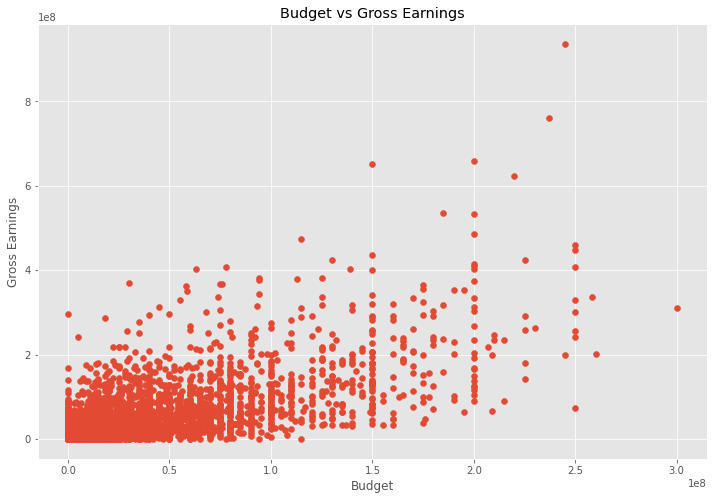

In [25]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

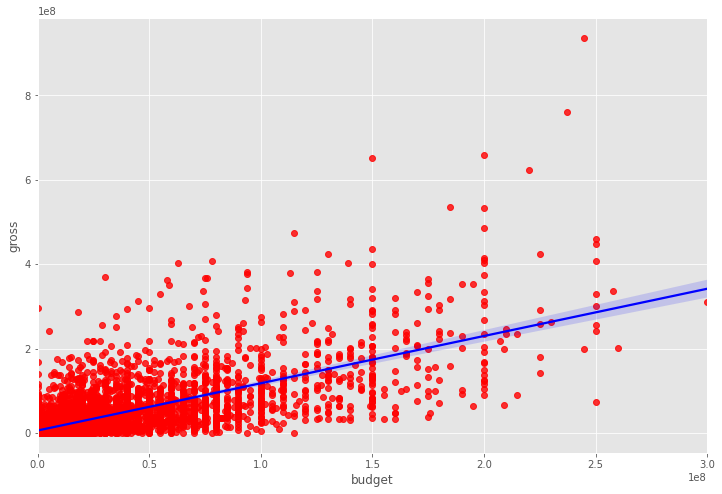

In [27]:
# Plot budget vs gross using seaborn
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

In [29]:
# Let's start look at the correlation
df.corr(method = 'pearson')
df.corr(method = 'spearman')
df.corr(method = 'kendall')
# Correlation methods: Pearson(default) Kendall, Spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


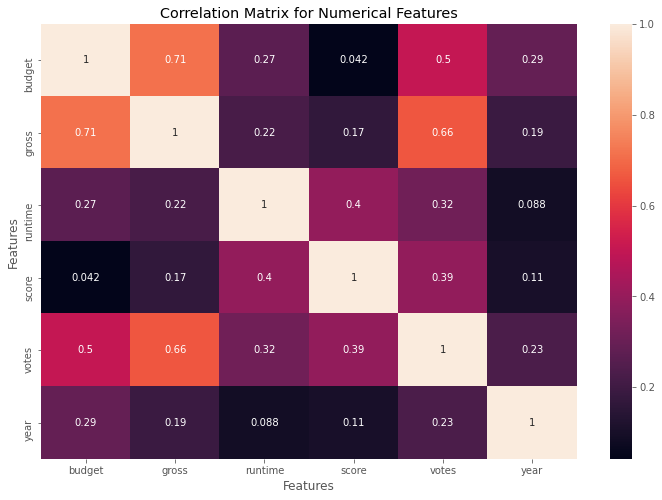

In [33]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [57]:
# Make other string object become categortical data
df_numerized = df
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category').cat.codes
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


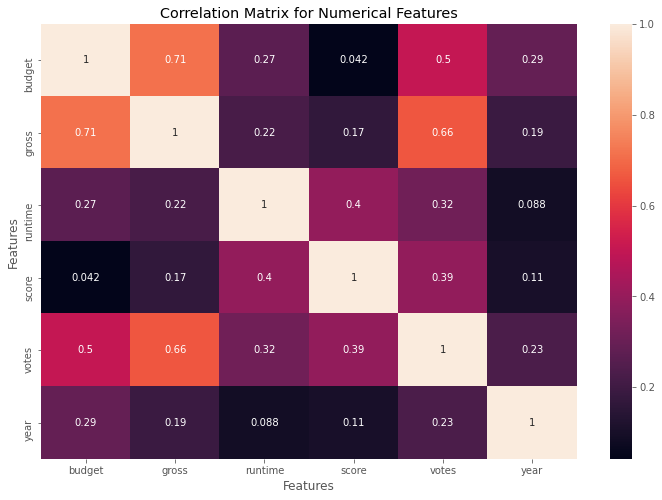

In [56]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [59]:
corr_pairs = df_numerized.corr().unstack()
corr_pairs

budget   budget     1.000000
         gross      0.712196
         runtime    0.268226
         score      0.042145
         votes      0.503924
         year       0.291009
gross    budget     0.712196
         gross      1.000000
         runtime    0.224579
         score      0.165693
         votes      0.662457
         year       0.191548
runtime  budget     0.268226
         gross      0.224579
         runtime    1.000000
         score      0.395343
         votes      0.317399
         year       0.087639
score    budget     0.042145
         gross      0.165693
         runtime    0.395343
         score      1.000000
         votes      0.393607
         year       0.105276
votes    budget     0.503924
         gross      0.662457
         runtime    0.317399
         score      0.393607
         votes      1.000000
         year       0.229304
year     budget     0.291009
         gross      0.191548
         runtime    0.087639
         score      0.105276
         votes

In [60]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

score    budget     0.042145
budget   score      0.042145
runtime  year       0.087639
year     runtime    0.087639
         score      0.105276
score    year       0.105276
gross    score      0.165693
score    gross      0.165693
gross    year       0.191548
year     gross      0.191548
gross    runtime    0.224579
runtime  gross      0.224579
votes    year       0.229304
year     votes      0.229304
runtime  budget     0.268226
budget   runtime    0.268226
         year       0.291009
year     budget     0.291009
votes    runtime    0.317399
runtime  votes      0.317399
score    votes      0.393607
votes    score      0.393607
score    runtime    0.395343
runtime  score      0.395343
votes    budget     0.503924
budget   votes      0.503924
gross    votes      0.662457
votes    gross      0.662457
gross    budget     0.712196
budget   gross      0.712196
         budget     1.000000
score    score      1.000000
runtime  runtime    1.000000
gross    gross      1.000000
votes    votes

In [62]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes    budget     0.503924
budget   votes      0.503924
gross    votes      0.662457
votes    gross      0.662457
gross    budget     0.712196
budget   gross      0.712196
         budget     1.000000
score    score      1.000000
runtime  runtime    1.000000
gross    gross      1.000000
votes    votes      1.000000
year     year       1.000000
dtype: float64